In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#installation
!pip install datasets
!pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.3 MB/s eta 0:00:00


In [ ]:
# importation
import os
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet


from matplotlib import axes
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize


from string import punctuation
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore")
import string

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

# data loading

In [ ]:
# Load the dataset and display some values
%%time
df_train= pd.read_csv("/content/drive/MyDrive/capstone/Train.csv")
df_test= pd.read_csv("/content/drive/MyDrive/capstone/Test.csv")

CPU times: user 519 ms, sys: 89.1 ms, total: 608 ms
Wall time: 1.89 s


In [ ]:
df_train.head()

,review_file,content,sentiment
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive
1,9693_8.txt,I was very surprised with this film. I was tou...,positive
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive


In [ ]:
df_test.head()

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."


# 1. EXPLORATORY DATA ANALYSIS

1.0 Data info

In [ ]:
# Create a dictionary 'data' with two datasets: 'df_train' and 'df_test'
data = {'df_train': df_train, 'df_test': df_test}

# Iterate over each dataset in the dictionary and print dataset information
for name, dataset in data.items():
    # Print a header indicating the dataset's name
    print(f"The info for {name} dataset is: \n\n")

    # Use the info() method to print a concise summary of the dataset's information
    print(dataset.info(), "\n" + "---" * 15)



The info for df_train dataset is: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
 2   sentiment    25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB
None 
---------------------------------------------
The info for df_test dataset is: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None 
---------------------------------------------


# i. checking for missing values

In [ ]:
# Create a dictionary 'data' with two datasets: 'df_train' and 'df_test'
data = {'df_train': df_train, 'df_test': df_test}

# Iterate over each dataset in the dictionary and check for missing values
for name, dataset in data.items():
    # Print a header indicating the dataset's name
    print(f"The info for {name} dataset is: \n\n")

    # Use the isna().sum() method to count missing values in each column of the dataset and print the result
    print(dataset.isna().sum(), "\n" + "---" * 15)


The info for df_train dataset is: 


review_file    0
content        0
sentiment      0
dtype: int64 
---------------------------------------------
The info for df_test dataset is: 


review_file    0
content        0
dtype: int64 
---------------------------------------------


In [ ]:
# checking for the shapes of the datasets
print(df_train.shape, df_test.shape)

(25000, 3) (25000, 2)


In [ ]:
# finding the frequency of the unique vales in the target
df_train['sentiment'].value_counts()

positive    12500
negative    12500
Name: sentiment, dtype: int64

In [ ]:
# making a copy
train_data=df_train.copy()
test_data= df_test.copy()

# Map values in 'sentiment' to 1 for 'positive' and 0 for 'negative'
train_data['label'] = train_data['sentiment'].map({'positive': 1, 'negative': 0})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
 2   sentiment    25000 non-null  object
 3   label        25000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 781.4+ KB


# ii. statistical distributions of the numerical features in the datasets

In [ ]:
# Create a dictionary 'df' with two datasets: 'train_data' and 'test_data'
df = {'train_data': train_data, 'test_data': test_data}

# Iterate over each dataset in the dictionary and print its statistical description
for name, dataset in df.items():
    # Print a header indicating the dataset's name
    print(f'The statistical description of the', name, "dataset :", "\n\n")

    # Use describe() to generate a statistical description of the dataset,
    # transpose (T) it for better readability, and print it
    print(dataset.describe().T, "\n\n", "---" * 25)


The statistical description of the train_data dataset : 


         count  mean      std  min  25%  50%  75%  max
label  25000.0   0.5  0.50001  0.0  0.0  0.5  1.0  1.0 

 ---------------------------------------------------------------------------
The statistical description of the test_data dataset : 


             count unique                                                top  \
review_file  25000  25000                                           0_10.txt   
content      25000  24801  Loved today's show!!! It was a variety and not...   

            freq  
review_file    1  
content        5   

 ---------------------------------------------------------------------------


# iii. Check for duplicates

In [ ]:
# Check for duplicates in the 'content' column of the train_data and test_data DataFrames
# Count the number of duplicated rows in each DataFrame

# Count duplicated rows in the 'content' column of the train_data DataFrame
duplicate_rows_train = train_data['content'].duplicated().sum()

# Count duplicated rows in the 'content' column of the test_data DataFrame
duplicate_rows_test = test_data['content'].duplicated().sum()

# Print the number of duplicated rows found in each dataset
print('There are', duplicate_rows_train, 'duplicated rows for the training set')
print('There are', duplicate_rows_test, 'duplicated rows for the test set')


There are 96 duplicated rows for the training set
There are 199 duplicated rows for the test set


In [ ]:
# Drop duplicated rows in the train_data DataFrame based on the 'content' column,
# keeping only the first occurrence of each duplicated content
train_data = train_data.drop_duplicates(subset='content', keep='first')

# Reset the index of the DataFrame after dropping duplicates
train_data = train_data.reset_index(drop=True)

# Select and retain only the 'review_file', 'content', 'sentiment', and 'label' columns in the DataFrame
train_data = train_data[['review_file', 'content', 'sentiment', 'label']]

# Display the first few rows of the modified train_data DataFrame
train_data.head()


,review_file,content,sentiment,label
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive,1
1,9693_8.txt,I was very surprised with this film. I was tou...,positive,1
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative,0
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive,1
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive,1


In [ ]:
# Drop duplicated rows in the test_data DataFrame based on the 'content' column,
# keeping only the first occurrence of each duplicated content
test_data = test_data.drop_duplicates(subset='content', keep='first')

# Reset the index of the DataFrame after dropping duplicates
test_data = test_data.reset_index(drop=True)

# Select and retain only the 'review_file' and 'content' columns in the DataFrame
test_data = test_data[['review_file', 'content']]

# Display the first few rows of the modified test_data DataFrame
test_data.head()


,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."


In [ ]:
# checking again whether, there are duplicates
#Check for duplicates
duplicate_rows_train = train_data['content'].duplicated().sum()
duplicate_rows_test = test_data['content'].duplicated().sum()
print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set


# iv. skewness

In [ ]:
def find_skewness(train_data,test_data):
  for i in find_skewness:
    print(find_skewness.skew(numeric_only=True))

# Calculate skewness for train_data
train_data_skew = train_data.skew()

# Calculate skewness for test_data
test_data_skew = test_data.skew()

# Display the skewness values
print("Skewness of train_data:")
print(train_data_skew)

print("\nSkewness of test_data:")
print(test_data_skew)

Skewness of train_data:
label   -0.003213
dtype: float64

Skewness of test_data:
Series([], dtype: float64)


# Distribution

<Axes: ylabel='Density'>

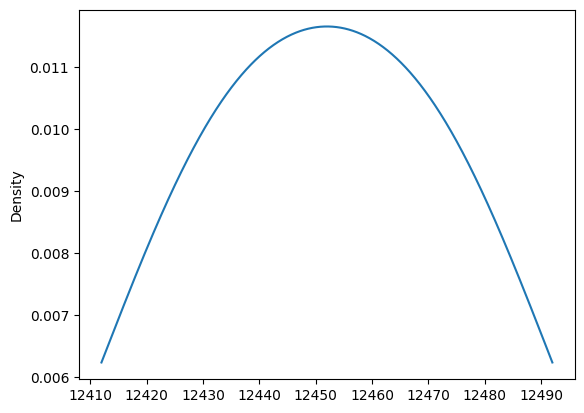

In [ ]:
# Calculate the value counts of the 'sentiment' column in the train_data DataFrame
# and create a kernel density estimation (KDE) plot to visualize the distribution
train_data['sentiment'].value_counts().plot(kind='kde')


- we can see that its a normal distribution

#1.2 Visualizations

In [ ]:
# visualizing the percentage unique values of the target  features.
fig_1 = px.pie(train_data, names='sentiment', title='Plot of percentage of the Label Variables (Sentiment)')
iplot(fig_1)

✍ summary:

from the visual, Label feature, We can observe that dataset;
49.9% of the sentiments are negative.
50.1% of the sentiments are positive

In [ ]:
# Create a histogram using Plotly Express (px) for the 'sentiment' column of the train_data DataFrame
# The 'color' parameter is set to 'sentiment' to color the bars by sentiment category
# The 'facet_col' parameter is set to 'sentiment' to create separate subplots for each sentiment category
# The 'title' parameter sets the title for the histogram
fig_3 = px.histogram(
    data_frame=train_data,
    x='sentiment',
    color="sentiment",
    facet_col="sentiment",
    title="Count of Sentiment"
)

# Display the histogram
fig_3.show()


✍ summary:

from the visual, Label feature, We can observe that dataset; 12,432 of the sentiments are negative. 12,472 of the sentiments are positive

# 1.3 Number of characters in a content

In [ ]:
# Calculate the number of characters in the 'content' column of the train_data DataFrame
train_data['characters_in_content'] = train_data['content'].str.len()


In [ ]:
train_data.head()


,review_file,content,sentiment,label,characters_in_content
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive,1,991
1,9693_8.txt,I was very surprised with this film. I was tou...,positive,1,655
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative,0,870
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive,1,1617
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive,1,515


In [ ]:
# Create a histogram using Plotly Express (px) for the 'characters_in_content' column of the train_data DataFrame
fig_4 = px.histogram(data_frame=train_data, x="characters_in_content", title="Count of Characters Present in content")

# Display the histogram
fig_4.show()


✍ summary:

from the visual, We can observe that; the highest count is 1690 at characters in content of 650-699

# 1.4 Number of words in content

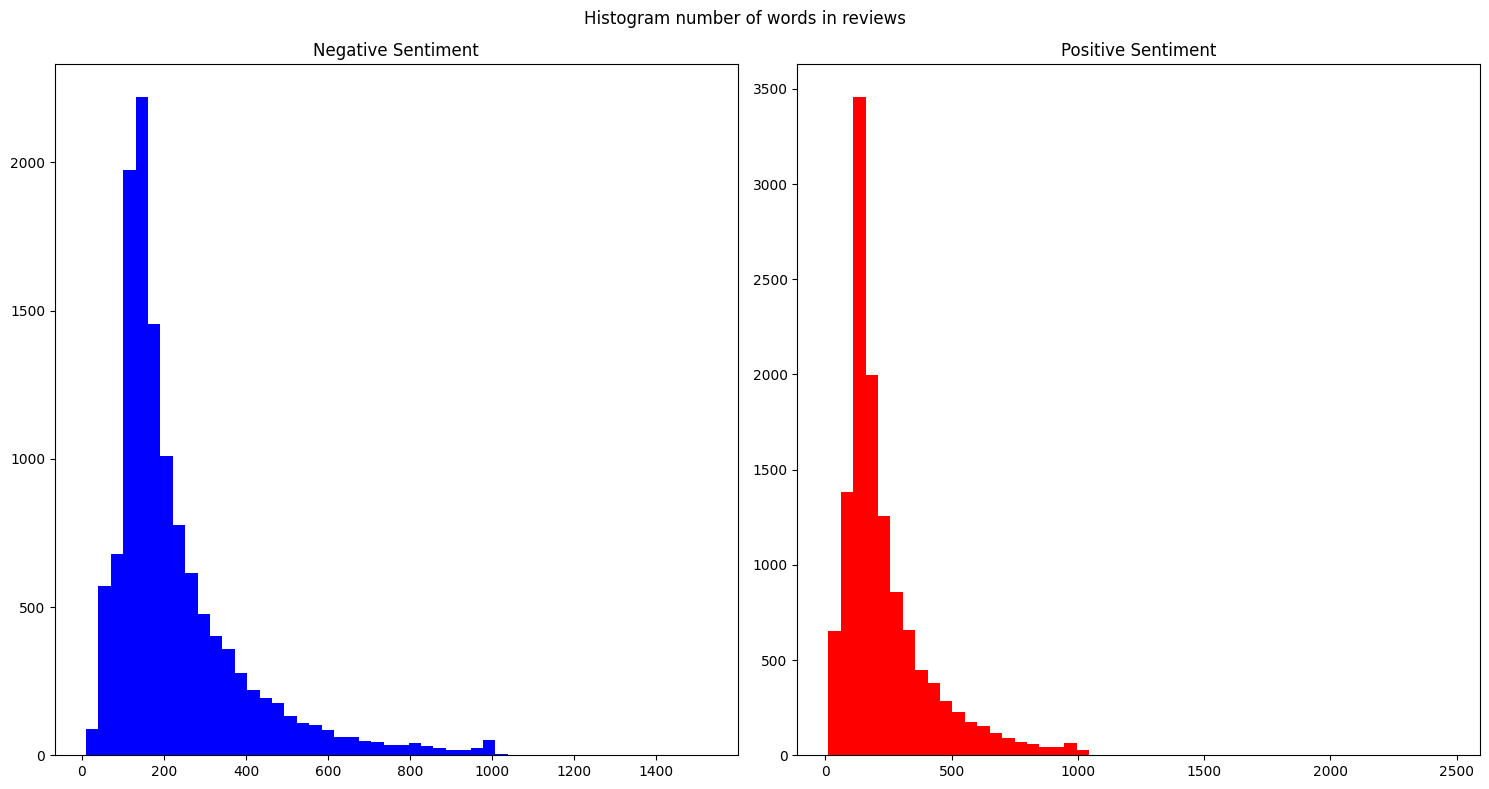

In [ ]:
# Create a figure with 1 row and 2 columns of subplots and set the figure size
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot a histogram of the number of words in reviews with 'Negative Sentiment' (label == 0)
ax1.hist(train_data[train_data['label'] == 0]['content'].str.split().map(lambda x: len(x)), bins=50, color='b')
ax1.set_title('Negative Sentiment')  # Set the title for the left subplot

# Plot a histogram of the number of words in reviews with 'Positive Sentiment' (label == 1)
ax2.hist(train_data[train_data['label'] == 1]['content'].str.split().map(lambda x: len(x)), bins=50, color='r')
ax2.set_title('Positive Sentiment')  # Set the title for the right subplot

# Set a super title for the entire figure
f.suptitle('Histogram number of words in reviews')

# Adjust the layout of subplots to prevent overlap
plt.tight_layout()

# Display the figure with the histograms
plt.show()


✍ summary:
the distribution behaves like a negative exponential function decreasing significatively as the x-axis increases.

# 1.5 Word cloud

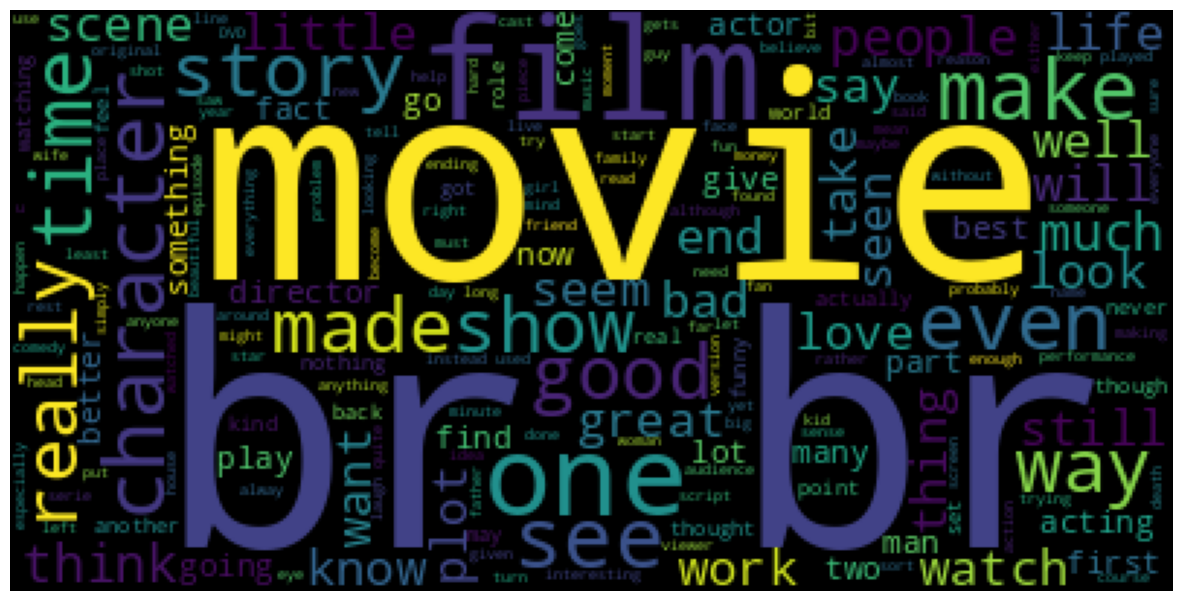

In [ ]:
# Select the "clean_tweet" column from the train_data DataFrame
train_content = train_data["content"]

# Convert all the cleaned tweets into a single string by joining them
train_text = " ".join(train_content)

# Create a WordCloud object and generate the word cloud from the combined text
wc_train = WordCloud().generate(train_text)

# Set the figure size for the plot
plt.figure(figsize=(15, 10))

# Display the generated word cloud using plt.imshow()
plt.imshow(wc_train)

# Turn off the axis to remove axes labels
plt.axis("off")

# Display the word cloud plot
plt.show()


✍ summary: the frequent words used are: movie,one,seen,br, time,really etc.

In [ ]:
# maximum number of words in content
train_data['content'].str.split().map(lambda x: len(x)).max()

2470

In [ ]:
# minimum number of words in content
train_data['content'].str.split().map(lambda x: len(x)).min()

10

# 1.7  Sentence in content

In [ ]:
# Create a DataFrame to check if the number of words in each sentence is greater than 1000
df = pd.DataFrame(train_data['content'].str.split().map(lambda x: len(x)) > 1000)
# Count the number of sentences that meet the condition and print the result
print('Number of sentences which contain more than 1000 words: ', df.loc[df['content'] == True].shape[0])
print(' ')

# Create a DataFrame to check if the number of words in each sentence is greater than or equal to 1000
df = pd.DataFrame(train_data['content'].str.split().map(lambda x: len(x)) >= 1000)
# Count the number of sentences that meet the condition and print the result
print('Number of sentences which contain more than or equal to 1000 words: ', df.loc[df['content'] == True].shape[0])
print(' ')

# Create a DataFrame to check if the number of words in each sentence is greater than or equal to 1500
df = pd.DataFrame(train_data['content'].str.split().map(lambda x: len(x)) >= 1500)
# Count the number of sentences that meet the condition and print the result
print('Number of sentences which contain more than or equal to 1500 words: ', df.loc[df['content'] == True].shape[0])
print(' ')

# Create a DataFrame to check if the number of words in each sentence is greater than or equal to 2000
df = pd.DataFrame(train_data['content'].str.split().map(lambda x: len(x)) >= 2000)
# Count the number of sentences that meet the condition and print the result
print('Number of sentences which contain more than or equal to 2000 words: ', df.loc[df['content'] == True].shape[0])
print(' ')

# Create a DataFrame to check if the number of words in each sentence is equal to 2470
df = pd.DataFrame(train_data['content'].str.split().map(lambda x: len(x)) == 2470)
# Count the number of sentences that meet the condition and print the result
print('Number of sentences which contain 2470 words: ', df.loc[df['content'] == True].shape[0])
print(' ')


Number of sentences which contain more than 1000 words:  51
 
Number of sentences which contain more than or equal to 1000 words:  60
 
Number of sentences which contain more than or equal to 1500 words:  7
 
Number of sentences which contain more than or equal to 2000 words:  1
 
Number of sentences which contain 2470 words:  1
 


In [ ]:
# Find the index of the content with the maximum length of words
max_length_index = train_data['content'].str.split().map(lambda x: len(x)).idxmax()

# Get the content with the maximum length
content_with_max_length = train_data.loc[max_length_index, 'content']

print("Content with Max Length:")
print(content_with_max_length)

Content with Max Length:
Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bub

In [ ]:
# displaying the longest sentence
train_data.loc[max_length_index,'content']

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

# 2.0 Data Preprocessing

2.1 Converting to Lowercase

In [ ]:
# Apply a lowercase transformation to all elements in the train_data DataFrame
train_data = train_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Apply a lowercase transformation to all elements in the test_data DataFrame
test_data = test_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
# Convert the 'content' column in the train_data DataFrame to a single string
train_data['content'] = train_data['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Convert the 'content' column in the test_data DataFrame to a single string
test_data['content'] = test_data['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [ ]:
train_data.head()

,review_file,content,sentiment,label,characters_in_content
0,3471_8.txt,recently shown on cable tv the movie opens wit...,positive,1,991
1,9693_8.txt,i was very surprised with this film. i was tou...,positive,1,655
2,10801_1.txt,"now, i'm one to watch movies that got poor rev...",negative,0,870
3,9592_8.txt,"this film came out 12 years years ago, and was...",positive,1,1617
4,8514_7.txt,"when an orphanage manager goes on vacation, hi...",positive,1,515


In [ ]:
train_data.drop(['review_file', 'sentiment', 'characters_in_content'], axis=1, inplace=True)


2.2 Removing url

In [ ]:
# Define a function to replace URLs in a DataFrame column
def replace_url(df, column):
    # Use regular expression to replace URLs in the 'content' column with 'urlweb'
    df_url = train_data['content'].str.replace(r'http.?://[^\s]+[\s]?', 'urlweb ')
    return df_url

# Apply the 'replace_url' function to the 'clean_content' column of the train_data DataFrame
train_data['clean_content'] = replace_url(train_data, 'clean_content')

# Apply the 'replace_url' function to the 'clean_content' column of the test_data DataFrame
test_data['clean_content'] = replace_url(test_data, 'clean_content')


2.3 Remove Digits

In [ ]:
# Define a function to remove digits from a DataFrame column
def remove_digits(df, column):
    # Use a lambda function and regular expression to remove digits from the 'content' column
    df_digits = df[column].apply(lambda x: re.sub(r'\d', '', x))
    return df_digits

# Apply the 'remove_digits' function to the 'clean_content' column of the train_data DataFrame
train_data['clean_content'] = remove_digits(train_data, 'clean_content')

# Apply the 'remove_digits' function to the 'clean_content' column of the test_data DataFrame
test_data['clean_content'] = remove_digits(test_data, 'clean_content')


2.4 Removing Punctuations

In [ ]:
# Define a function to remove punctuations from a given text using regular expressions
def punctuation_remover(text):
    return re.sub("[^\w\s]", repl=" ", string=text)

# Apply the 'punctuation_remover' function to the 'content' column in train_data
train_data["clean_content"] = train_data["content"].apply(punctuation_remover)

# Apply the 'punctuation_remover' function to the 'content' column in test_data
test_data["clean_content"] = test_data["content"].apply(punctuation_remover)


In [ ]:
train_data['clean_content'].head()

0    recently shown on cable tv the movie opens wit...
1    i was very surprised with this film  i was tou...
2    now  i m one to watch movies that got poor rev...
3    this film came out 12 years years ago  and was...
4    when an orphanage manager goes on vacation  hi...
Name: clean_content, dtype: object

In [ ]:
   train_data['clean_content'].head()

0    recently shown on cable tv the movie opens wit...
1    i was very surprised with this film  i was tou...
2    now  i m one to watch movies that got poor rev...
3    this film came out 12 years years ago  and was...
4    when an orphanage manager goes on vacation  hi...
Name: clean_content, dtype: object

In [ ]:
final_dataset = train_data.copy()
final_dataset.to_csv('/content/drive/MyDrive/capstone/movie_review_dataset.csv', index=False)

In [ ]:
final=pd.read_csv('/content/drive/MyDrive/capstone/movie_review_dataset.csv')
final.head()

,content,label,clean_content
0,recently shown on cable tv the movie opens wit...,1,recently shown on cable tv the movie opens wit...
1,i was very surprised with this film. i was tou...,1,i was very surprised with this film i was tou...
2,"now, i'm one to watch movies that got poor rev...",0,now i m one to watch movies that got poor rev...
3,"this film came out 12 years years ago, and was...",1,this film came out 12 years years ago and was...
4,"when an orphanage manager goes on vacation, hi...",1,when an orphanage manager goes on vacation hi...
